In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
netflix = pd.read_csv('/content/netflix_dataset.csv')

In [ ]:
### Top rows in data
netflix.head()

NameError: name 'netflix' is not defined

In [ ]:
## Filling Nan Values
netflix['cast'].fillna('Unknown', inplace=True)
netflix['director'].fillna('Unknown', inplace=True)
netflix['country'].fillna('Unknown', inplace=True)
netflix['listed_in'].fillna('Unknown', inplace=True)

In [ ]:
## Splitting
cast=netflix['cast'].apply(lambda x:x.split(", ")).tolist()
director=netflix['director'].apply(lambda x:x.split(", ")).tolist()
country=netflix['country'].apply(lambda x:x.split(", ")).tolist()
listed=netflix['listed_in'].apply(lambda x:x.split(", ")).tolist()


In [ ]:
## Creating Dataframe for the Splitted Values
ca = pd.DataFrame(cast, index = netflix['title']).stack().reset_index().drop(columns = ['level_1']).rename(columns = {0:'cast_x'})
di = pd.DataFrame(director, index = netflix['title']).stack().reset_index().drop(columns = ['level_1']).rename(columns = {0:'director_x'})
co = pd.DataFrame(country, index = netflix['title']).stack().reset_index().drop(columns = ['level_1']).rename(columns = {0:'country_x'})
li = pd.DataFrame(listed, index = netflix['title']).stack().reset_index().drop(columns = ['level_1']).rename(columns = {0:'listed_in_x'})


In [ ]:
## Creating Seperate column for Minutes & No.of.Seasons
netflix['Movie_min'] = netflix[netflix['type'] == 'Movie']['duration'].apply(lambda x: float(str(x).split(" ")[0]))
netflix['Seasons'] = netflix[netflix['type'] == 'TV Show']['duration'].apply(lambda x: float(str(x).split(" ")[0]))

In [ ]:
## Filling NaN values with O
netflix['Movie_min'].fillna(0,inplace =  True)
netflix['Seasons'].fillna(0,inplace =  True)

In [ ]:
## Converting Datetime datatype
netflix['date_added'] = pd.to_datetime(netflix['date_added'],errors = 'coerce')

In [ ]:
## Extracting Year from yearadded colums
netflix['year_added'] = netflix['date_added'].dt.year


In [ ]:
## Dropping the old Columns
netflix.drop(columns=['cast','country','director','listed_in'],inplace = True)


In [ ]:
## Merging the data with splitted Dataframe
netflix = netflix.merge(ca,how = 'left')
netflix = netflix.merge(di,how = 'left')
netflix = netflix.merge(co,how = 'left')
netflix = netflix.merge(li,how='left')

In [ ]:
## Dropping Duplicate Rows
netflix.drop_duplicates(inplace = True)

In [ ]:
## Imputing Country Column with mode
netflix['country_x']=netflix['country_x'].fillna(netflix.groupby('type')['country_x'].apply(lambda x: x.mode()[0]))

In [ ]:
## Renaming the added colunmns
netflix.rename(columns = {'cast_x':'cast','director_x':'director','country_x':'country','listed_in_x':'listed_in'},inplace = True)


In [ ]:
## Renaming the Improper Ratings
rating_mapping = {
    '74 min': 'NR',
    '84 min': 'NR',
    '66 min': 'NR',
    'NaN': 'NR'    # Assuming 'NaN' represents missing values
}
netflix['rating'] = netflix['rating'].replace(rating_mapping)

In [ ]:
mode_country = netflix['country'].mode()[0]

# Replace NaN values with the mode
netflix['country'] = netflix['country'].fillna(mode_country)
mode_country_excluding_unknown = netflix[netflix['country'] != 'Unknown']['country'].mode()[0]

# Replace 'Unknown' values with the mode excluding 'Unknown'
netflix['country'] = netflix['country'].replace('Unknown', mode_country_excluding_unknown)

In [ ]:
## Cleaned Data

netflix

,show_id,type,title,date_added,release_year,rating,duration,description,Movie_min,Seasons,year_added,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",90.0,0.0,2021.0,Unknown,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0.0,2.0,2021.0,Ama Qamata,Unknown,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0.0,2.0,2021.0,Ama Qamata,Unknown,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0.0,2.0,2021.0,Ama Qamata,Unknown,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0.0,2.0,2021.0,Khosi Ngema,Unknown,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,111.0,0.0,2019.0,Anita Shabdish,Mozez Singh,India,International Movies
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,111.0,0.0,2019.0,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,111.0,0.0,2019.0,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,111.0,0.0,2019.0,Chittaranjan Tripathy,Mozez Singh,India,International Movies


**Analysis**

**1** **No.of Movies Released on Netflix**

In [ ]:

a = netflix.copy()


In [ ]:
b = netflix['title'].nunique()
b

8807




*   Insights: As per the given dataset there were 8807 released on Netflix


**2 No of Movies Released every year**

In [ ]:
x = netflix.copy()
c = pd.DataFrame(x)
unique_movies = c.drop_duplicates(subset='title')
b_counts = unique_movies['year_added'].value_counts()

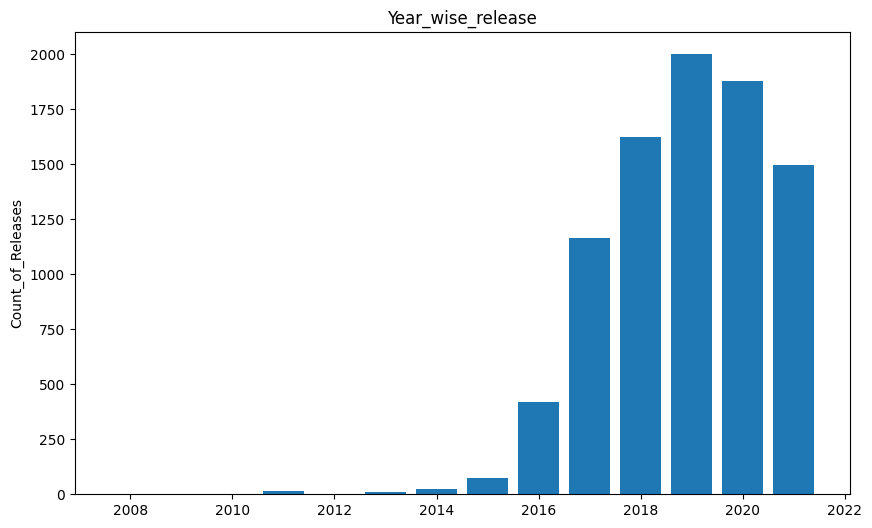

In [ ]:
plt.figure(figsize=(10,6))
x_bar = b_counts.index
y_bar = b_counts
plt.bar(x_bar,y_bar)
plt.title("Year_wise_release")
plt.ylabel("Count_of_Releases")
plt.show()




*   Insights:
            * 2019 was the year were the most number of Movies/Tv Shows were Released on Netflix.
            * No of Releases on Netflix were dropped after 2019.

* Recommendations:
            * As the Number of releases were dropped after 2019 So Try to add some more new contents to retain the customers.


**3 Percentage of Movies and Tv Shows in Netflix**

In [ ]:
x = netflix.copy()
c = pd.DataFrame(x)
unique_movies = c.drop_duplicates(subset='title')
b_counts = unique_movies['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

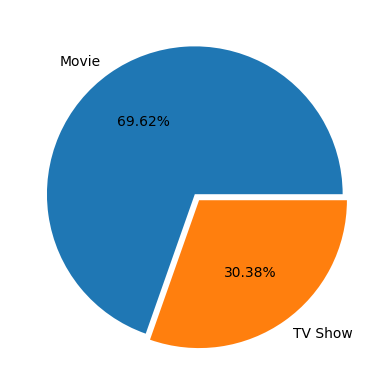

In [ ]:
plt.pie(b_counts,labels = b_counts.index,autopct = "%.2f%%",explode = (0,0.05))
plt.show()



*   Insights:
        * Netflix has more Movies than TV shows.

*   Recommendations:
        * Adding more TV shows will enhance the retain subscribers. Will Influence those common people who mostly reliant on TV shows rather than movies


**4 Boxplot showing the distribution of release years in the Netflix dataset:**

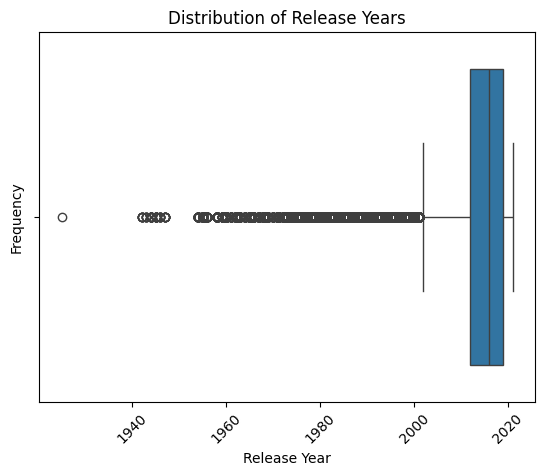

In [ ]:
a = netflix.copy()
sns.boxplot(x='release_year', data=a)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



*  **Insights**
        * 2019 was the medain year.
        * Between 2015 to 2019 years were most no of titles were released




*   **Recommendations**
        * The releasing trend has been going down after 2019. Try to add some good contents,
        So that we can maintain and satisfy the customers.





**5 Bar Plot showing the Most Popular Director**

In [ ]:
x = netflix.copy()
c = pd.DataFrame(x)
c = c[c['type']=='Movie']
unique_movies = c.drop_duplicates(subset=['title','director'])
b = unique_movies['director'].value_counts()
b = b[b.index != 'Unknown'].head(5)


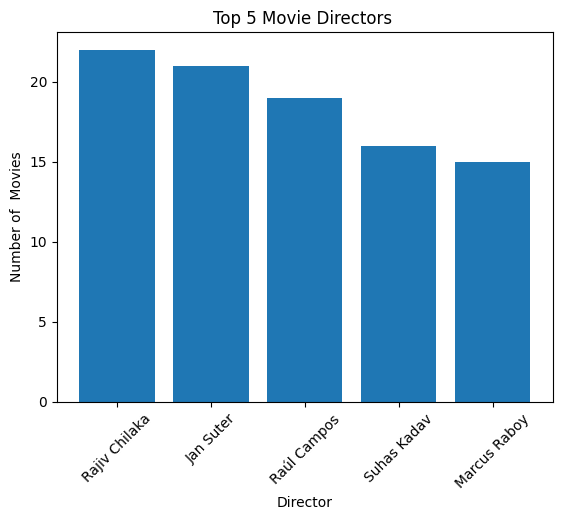

In [ ]:
x = b.index
y = b
plt.bar(x,y)
plt.title('Top 5 Movie Directors ')
plt.xlabel('Director')
plt.ylabel('Number of  Movies')
plt.xticks(rotation=45)
plt.show()



*   **Insights**
          * These were the top 5 directors




*   Recommendations
          * Try Releasing these directors movies as early as possible.



**6 Countplot Showing the most popular TV show director**

In [ ]:
x = netflix.copy()
c = x[x['type']=='TV Show']
unique_movies = c.drop_duplicates(subset=['title','director'])
b = unique_movies['director'].value_counts()
b = b[b.index != 'Unknown'].head(5)
b = pd.DataFrame(b)
b.reset_index(inplace=True)
b.columns = ['director', 'count']
b['count'] = b['count'].astype(int)

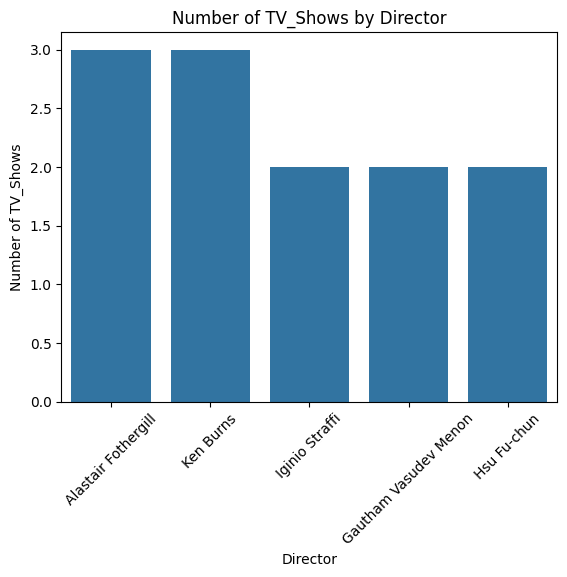

In [ ]:
sns.barplot(data=b, x='director', y='count', order=b['director'])
plt.xticks(rotation = 45)
plt.xlabel('Director')
plt.ylabel('Number of TV_Shows')
plt.title('Number of TV_Shows by Director')
plt.show()

* Insights:
       * These were the most popular TV show directors on the basis on No of Movies produced.

* Recommendations:
      * Adding the tv Shows of these directors more quickly will enhance new customers.

**7 Countplot the Distribution of Titles by Genre**

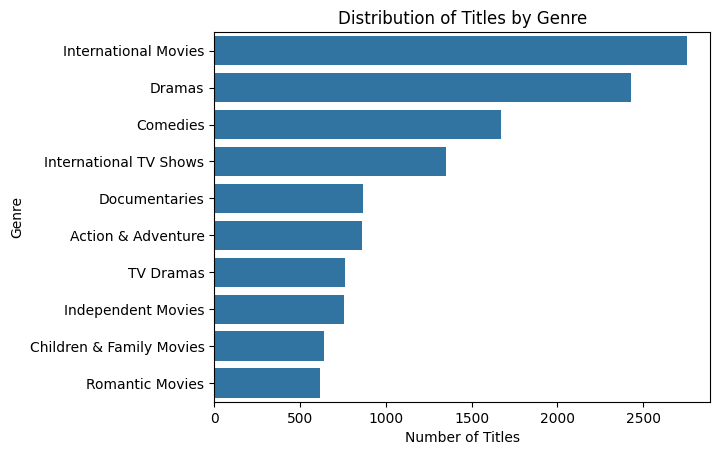

In [ ]:
a = netflix.copy()
a = a.drop_duplicates(subset=['title','listed_in'])
b = a['listed_in'].value_counts()
b = b.head(10)
c = a[a['listed_in'].isin(b.index)]
sns.countplot(data=a, y='listed_in', order=b.index)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Distribution of Titles by Genre')
plt.show()



*   **Insights:**
          * International movies were the most released in Netflix.
      


*  **Recommendations:**
          * Releasing more International movies will increases the Subscribers all over the world.
  





**8 Bar Plot showing the Number of titles released in every country**

In [ ]:
x = netflix.copy()
c = pd.DataFrame(x)
unique_movies = c.drop_duplicates(subset=['title','country'])
b = unique_movies['country'].value_counts()
b = b[b.index != 'Unknown'].head(5)


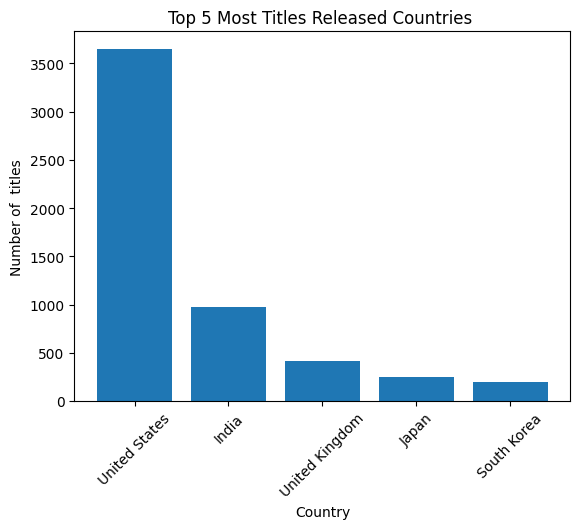

In [ ]:
x = b.index
y = b
plt.bar(x,y)
plt.title('Top 5 Most Titles Released Countries ')
plt.xlabel('Country')
plt.ylabel('Number of  titles')
plt.xticks(rotation=45)
plt.show()

* Insights:
       * These were the most title  releasing countries  on the basis ofNo of Movies released.

* Recommendations:
      * Releasing more titles in these countries will lead to have new customers.

**9 Countplot Showing the Count of the Ratings received by the respective titles**


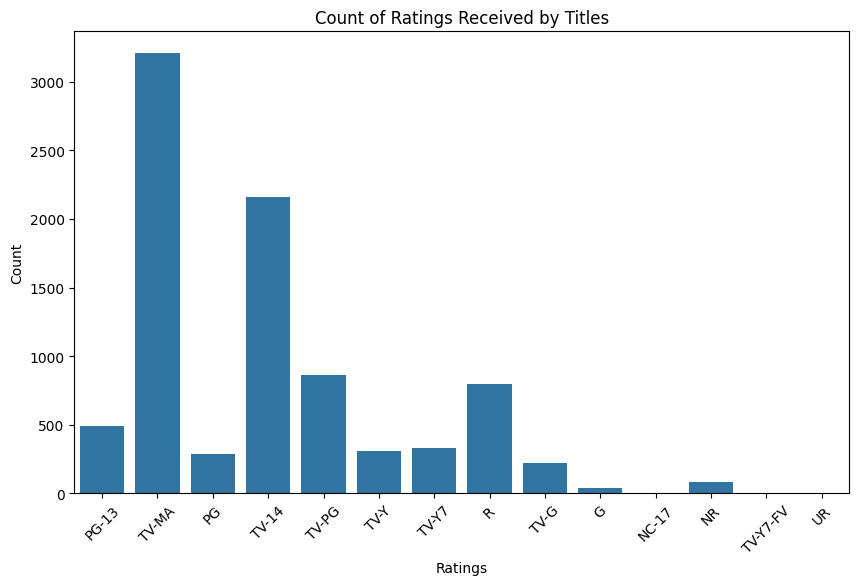

In [ ]:
a = netflix.copy()
unique_titles = a.drop_duplicates(subset='title')
plt.figure(figsize=(10, 6))
sns.countplot(data=unique_titles, x='rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Count of Ratings Received by Titles')
plt.xticks(rotation=45)
plt.show()


* Insights:
       * Most of the movies had the TV-MA ratings.


* Recommendations:
      * Releasing Movies with High ratings will enhance old as well as new customers because of the good contents that were releasing on Netflix.

**Lineplot gives the Trend of Number of releases of TV shows and Movies**

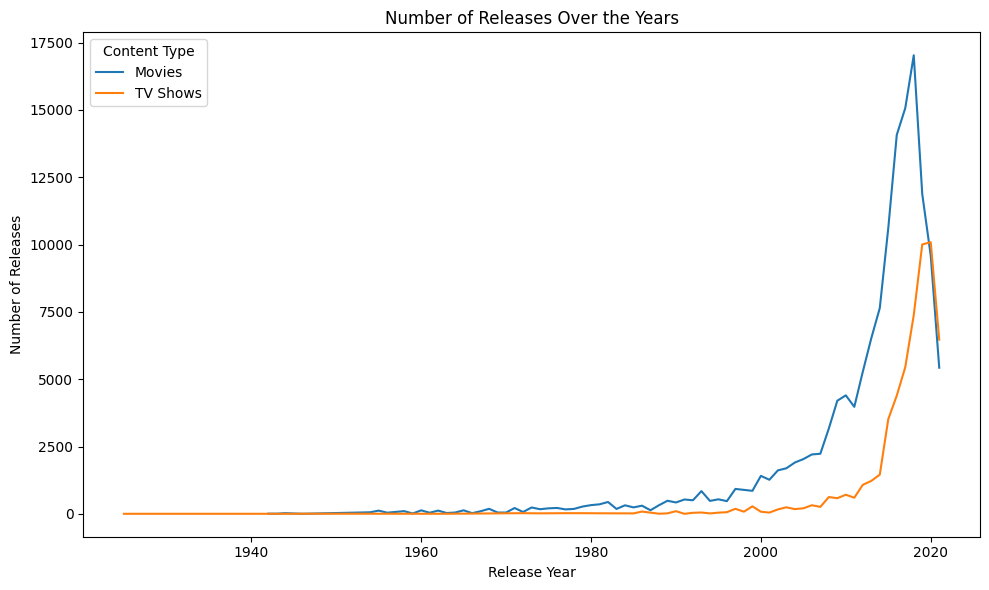

In [ ]:
a = netflix.copy()
movies_data = a[a['type'] == 'Movie']
tv_shows_data = a[a['type'] == 'TV Show']
movie_counts_by_year = movies_data['release_year'].value_counts().sort_index()
tv_show_counts_by_year = tv_shows_data['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_counts_by_year.index, y=movie_counts_by_year.values, label='Movies')
sns.lineplot(x=tv_show_counts_by_year.index, y=tv_show_counts_by_year.values, label='TV Shows')
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

* Insights:
       * The trend shows that Movies were the most released titles on Netlfix recently.
       * 2019 were most movies got released.

* Recommendations:
      * Adding the more movies as well TV shows will be good for respective subscribers.

**Best Time To release a TV Show**

<ipython-input-64-2b0cf5249b3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['month_added'] = pd.to_datetime(tv_shows_data['date_added']).dt.month_name()
<ipython-input-64-2b0cf5249b3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added', data=tv_shows_data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='viridis')


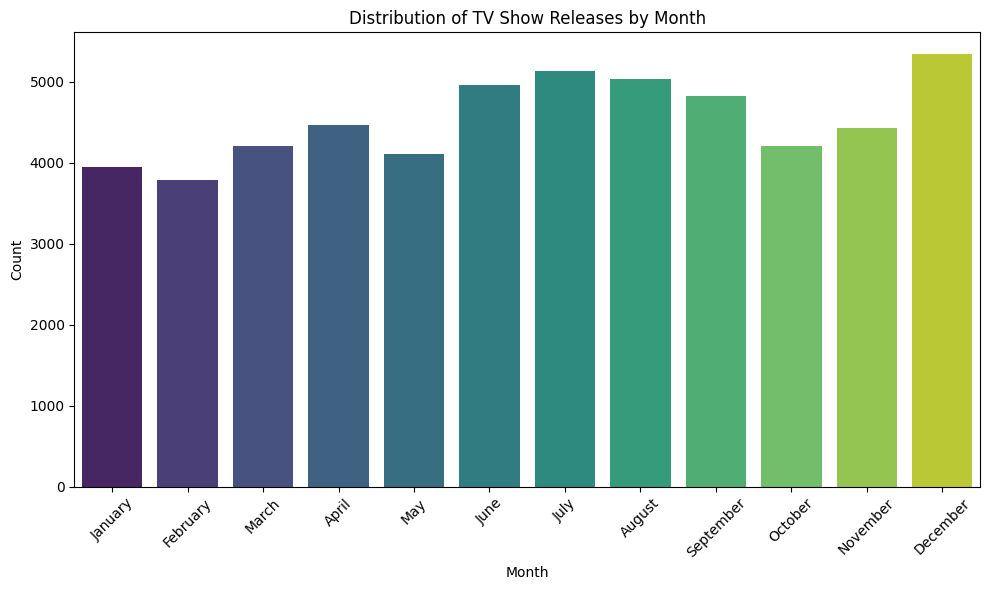

In [ ]:
a = netflix.copy()
tv_shows_data = a[a['type'] == 'TV Show']

tv_shows_data['month_added'] = pd.to_datetime(tv_shows_data['date_added']).dt.month_name()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='month_added', data=tv_shows_data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='viridis')
plt.title('Distribution of TV Show Releases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

* Insights:
       * These were the months with most movie releases on the basis on No of Movies releases.
       * Almost June,July,December releases the most number of movies.

* Recommendations:
      * Releasing titles on December month is a better option.

**Line chart showing the number of titles over time**

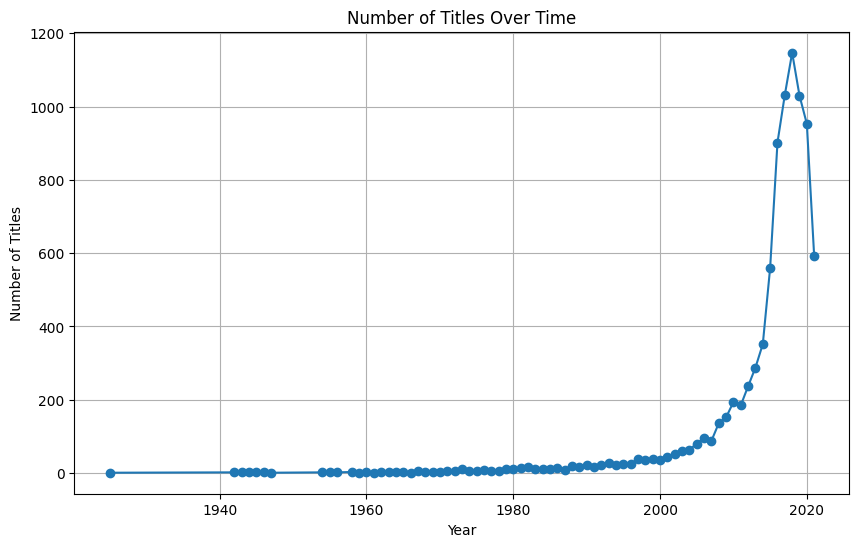

In [ ]:
a = netflix.copy()
titles_over_time = netflix.groupby('release_year').size()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(titles_over_time.index, titles_over_time.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Over Time')
plt.grid(True)  # Add gridlines
plt.show()

**Line chart  showing the number of titles for each rating category  over time**

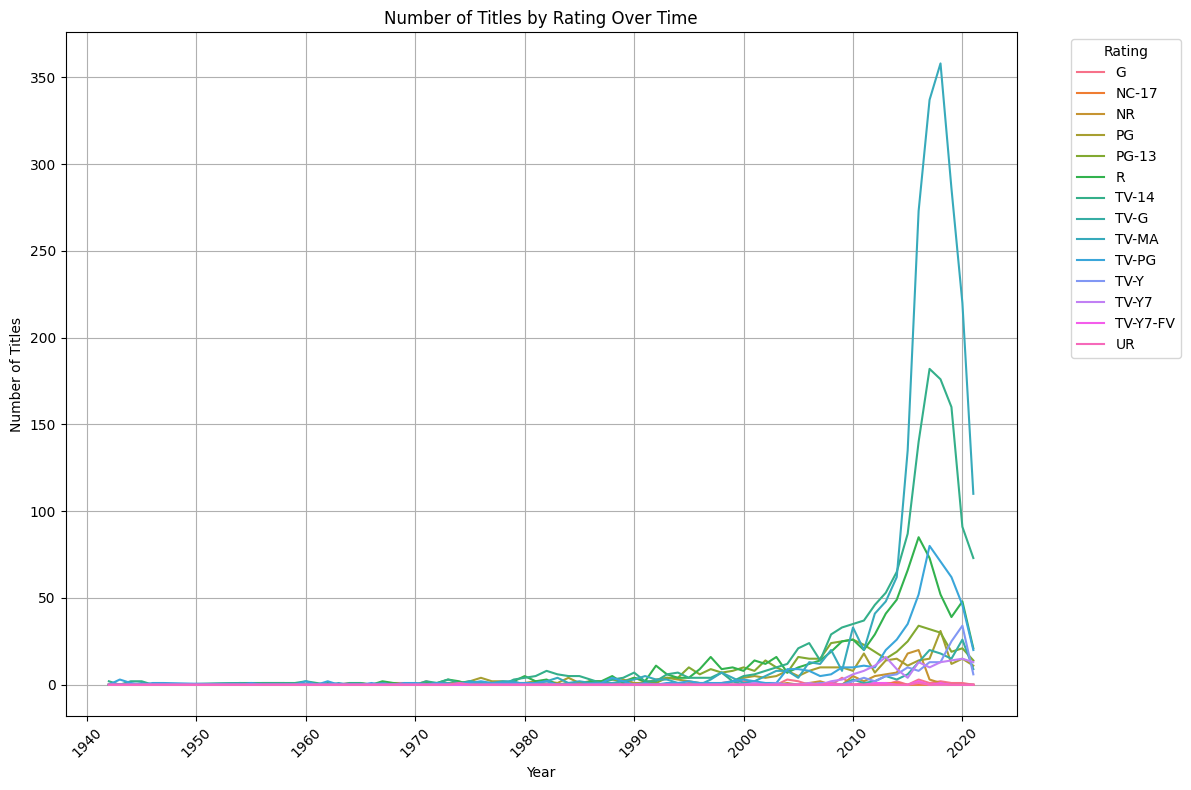

In [ ]:
a = netflix.copy()
movies_data = netflix[netflix['type'] == 'Movie']

# Group the data by 'release_year' and 'rating' columns, and count the number of titles
titles_by_rating_over_time = movies_data.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

# Plotting line chart for number of titles by rating over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=titles_by_rating_over_time, dashes=False)
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Rating Over Time')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

* Insights:
       * Movies releases in 2019 has the most ratings of TV-MA.

* Recommendations:
      * Releasing movies with TV-MA has a higher chance of reaching most customers.

**Scatterplot shows the trend between Movie duration over the years**

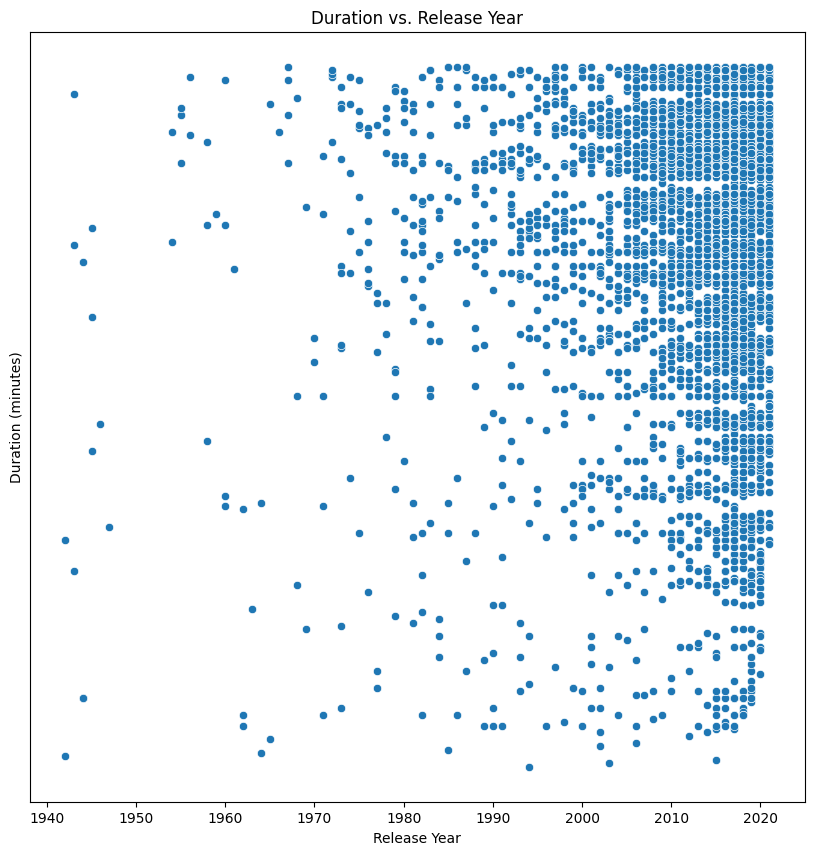

In [ ]:
a = netflix.copy()
movies_data = a[a['type'] == 'Movie']
movie_data = movies_data.drop_duplicates(subset = ['title','duration'])
plt.figure(figsize=(10, 10))
sns.scatterplot(data=movies_data, x='release_year', y='duration')
plt.xlabel('Release Year')
plt.yticks([])
plt.ylabel('Duration (minutes)')
plt.title('Duration vs. Release Year')
plt.show()



*   **Insights:**
          * The scatterplot shows that there is no clear trend in movie durations over the years,
          with durations scattered across different release years.
* **Recommendations:**
          * Continuously monitor audience preferences and industry trends to ensure that the duration of movies produced or acquired by Netflix aligns with viewer expectations.
          Consider conducting audience surveys or analyzing viewership data to gain insights into preferred movie durations.



**Dodged Bar Chart shows the Count of Movies by Top 3 Ratings and Top 3 Genre**

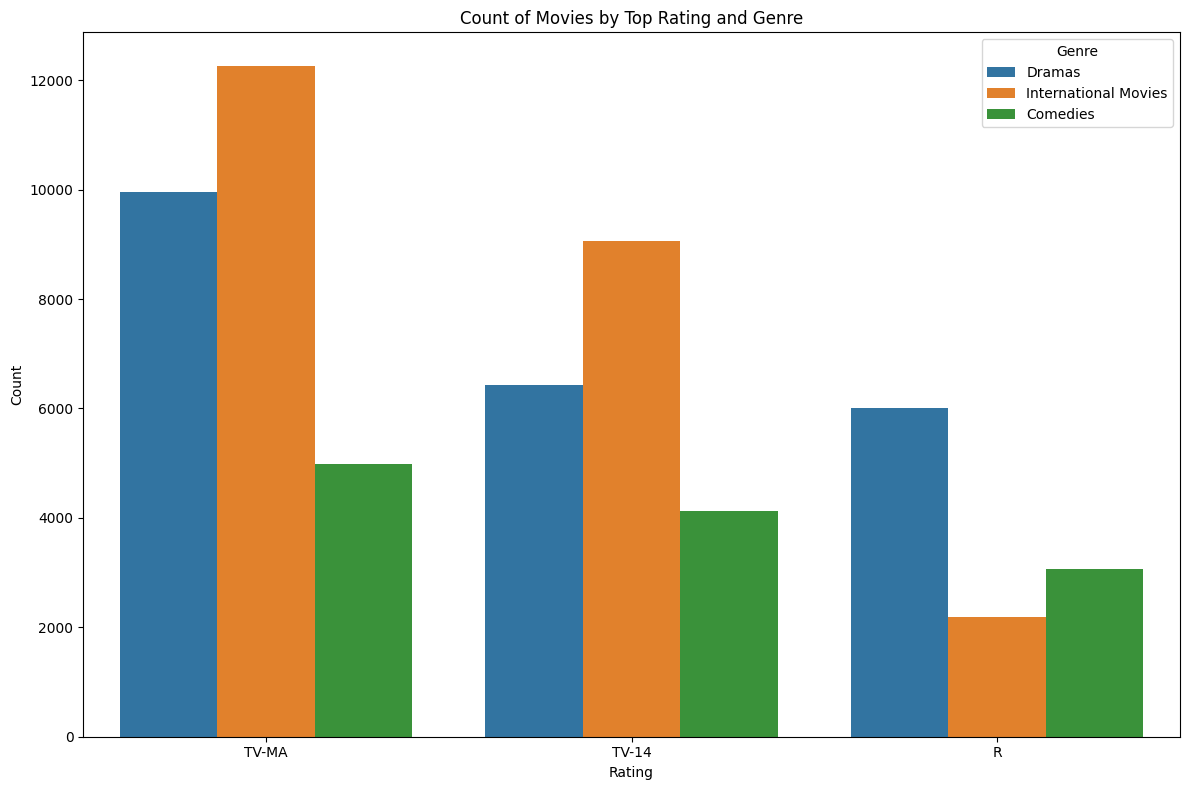

In [ ]:
a = netflix.copy()
movies_data = a[a['type'] == 'Movie']
rating = a['rating'].value_counts().index[:3]
genre = a['listed_in'].value_counts().index[:3]
a = a.loc[((a['rating']).isin(rating)&(a['listed_in']).isin(genre))]
# Plot a bivariate countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=a, x='rating', hue='listed_in')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Movies by Top Rating and Genre')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()



*  **Insights:**
          * For a Genre International Movies with Rating TV-MA has the most number of titles released.
          * R Rating has the least movies released across top 3 Genre.

* **Recommendations:**
          * Try to Release movies with International Movie genre, because it mostly getting the top ratings.
          * Releasing movies with Genres Drama,International Movies,Comedies. also with Tv ratings TV-MA,TV-14,R will increase the customer counts.


**Stacked bar chart showing the distribution of  top 3movie genres across top 3 movie releasing countries**

<Figure size 1200x800 with 0 Axes>

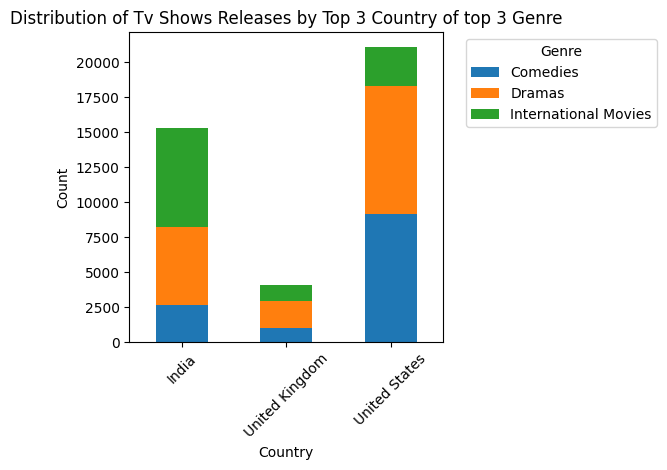

In [ ]:
a = netflix.copy()
movies_data = a[a['type'] == 'Tv Shows']
country = a['country'].value_counts().index[:3]
genre = a['listed_in'].value_counts().index[:3]
a = a.loc[((a['country']).isin(country)&(a['listed_in']).isin(genre))]

country_release_counts = a.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
country_release_counts.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Tv Shows Releases by Top 3 Country of top 3 Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*  **Insights:**
          * Of the top 3 Countries Unites States releases the most movies of Comedies,Dramas genres.
          * India Releases the most number of International Movie Genre.
          * Even though United Kingdom is in top 3 movie releasing countries, it release very few movies compared to India and united States.
          * India releases movies of all the genres almost equally.
* **Recommendations:**
          * Use this insight to tailor content offerings for different regions. Consider prioritizing genres that are popular in specific countries when acquiring or producing content. This can help attract and retain subscribers in those regions.


**Bar Plot showing the Distribution of ratings by content type**

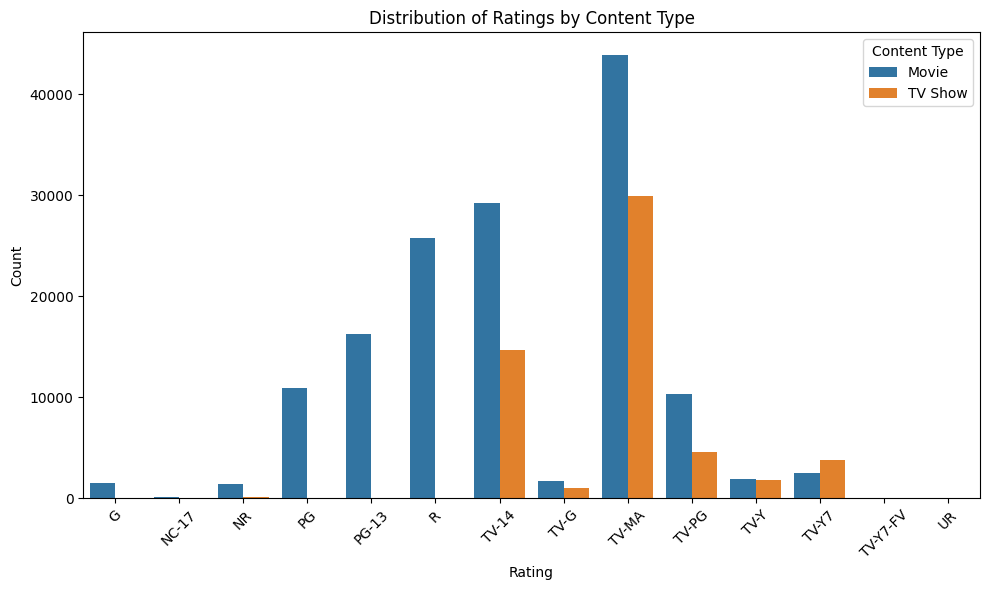

In [ ]:
a = netflix.copy()
a = a.groupby(['rating', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='count', hue='type', data=a)
plt.title('Distribution of Ratings by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

* Insights:
       * TV-MA rated Movies/Tv Shows were the most released titles on Netflix

* Recommendations:
      * Adding the TV-MA rated Movies/Tv Shows will enhance new customers.

**Distribution of Content Genres across top 10 Countries**

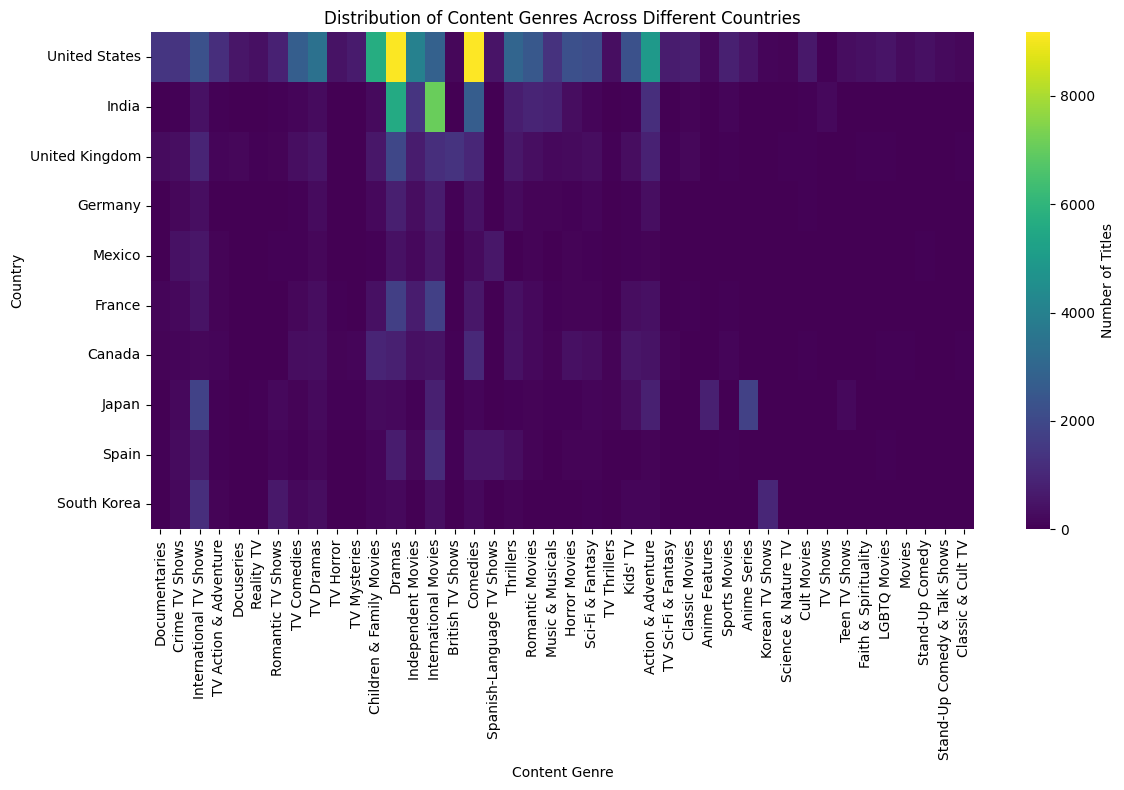

In [ ]:
a = netflix.copy()
country = a['country'].value_counts().index[:10]
a= a.loc[(a['country']).isin(country)]
data = a.dropna(subset=['country', 'listed_in'])
countries = data['country'].unique()
genres = data['listed_in'].unique()
genre_counts_by_country = pd.DataFrame(index=countries, columns=genres)
for country in countries:
    country_data = data[data['country'] == country]
    genre_counts = country_data['listed_in'].value_counts()
    genre_counts_by_country.loc[country, genre_counts.index] = genre_counts.values
plt.figure(figsize=(12, 8))
sns.heatmap(genre_counts_by_country.fillna(0), cmap='viridis', cbar_kws={'label': 'Number of Titles'})
plt.title('Distribution of Content Genres Across Different Countries')
plt.xlabel('Content Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Insights:

 * Heatmap shows the distribution of different genres in top 10 countries

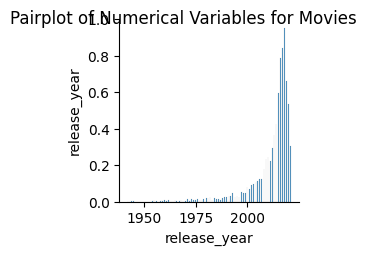

In [ ]:
a = netflix.copy()
movies_data = a[a['type'] == 'Movie']

# Selecting numerical variables
numerical_vars = ['release_year', 'duration']

# Drop rows with missing values in selected numerical variables
movies_data = movies_data.dropna(subset=numerical_vars)

# Create pairplot
sns.pairplot(movies_data[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables for Movies')
plt.show()

**Histogram showing the No of Movies  Released over the years**

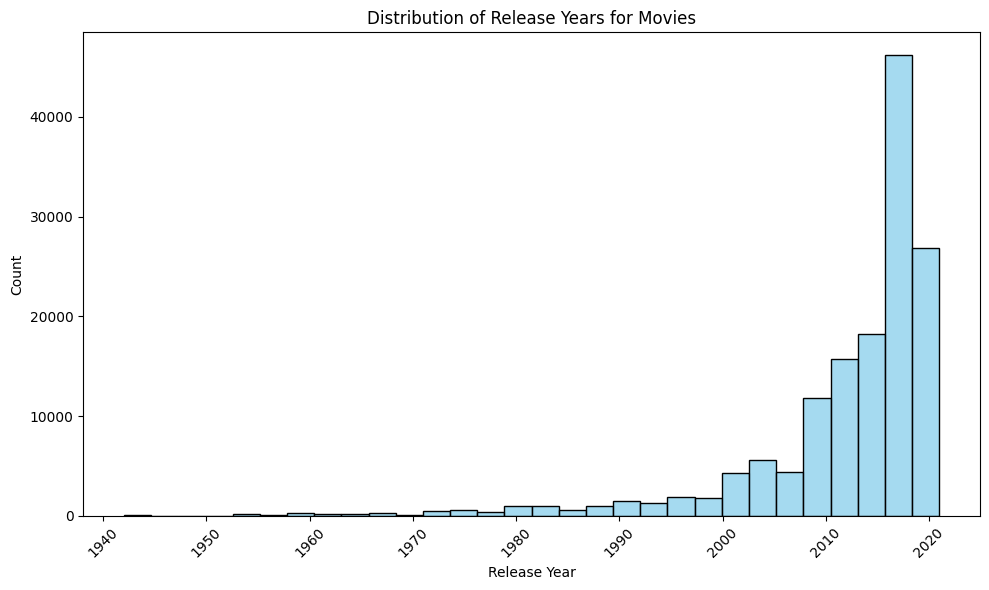

In [ ]:
a = netflix.copy()
movies_data = a[a['type'] == 'Movie']

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['release_year'], bins=30, color='skyblue')
plt.title('Distribution of Release Years for Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insights:

 * Releasing trend has gone down after 2019
Recommendations:

* Adding the  Movies/Tv Shows will enhance new customers.

**Histogram showing the different content type**

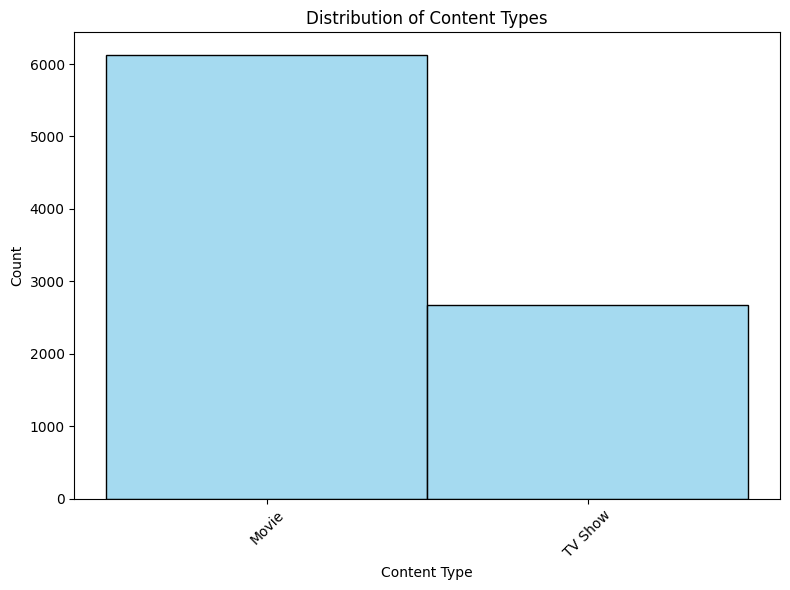

In [ ]:
a= netflix.copy()
a = a.drop_duplicates(subset = ['title'])
plt.figure(figsize=(8, 6))
sns.histplot(a['type'], bins=2, discrete=True, color='skyblue')
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Insights:

 * Movies were mostly released in Netflix

**Histogram Showing the distribution of movie durations in the Netflix dataset**

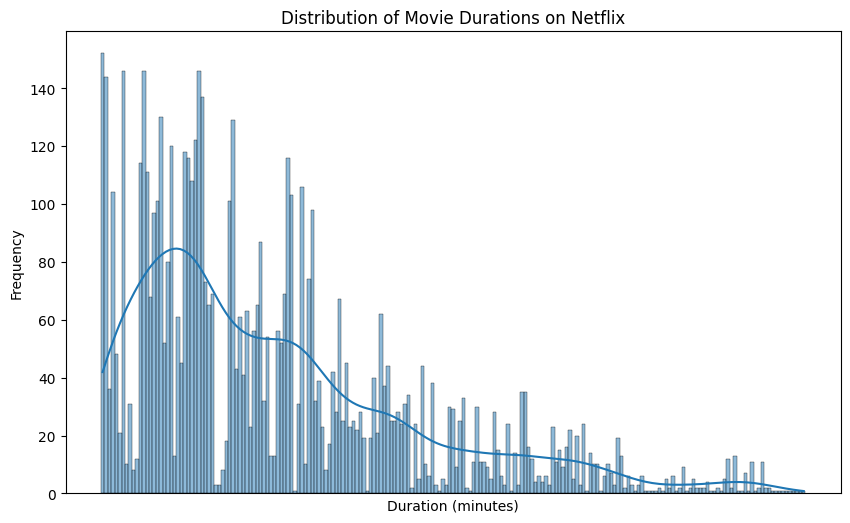

In [ ]:
a = netflix[netflix['type'] == 'Movie']
a = a.drop_duplicates(subset='title')
plt.figure(figsize=(10, 6))
sns.histplot(a['duration'], bins=20, kde=True)
plt.xticks([])
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.show()

**Heatmap of Count of Titles by Genre and year**

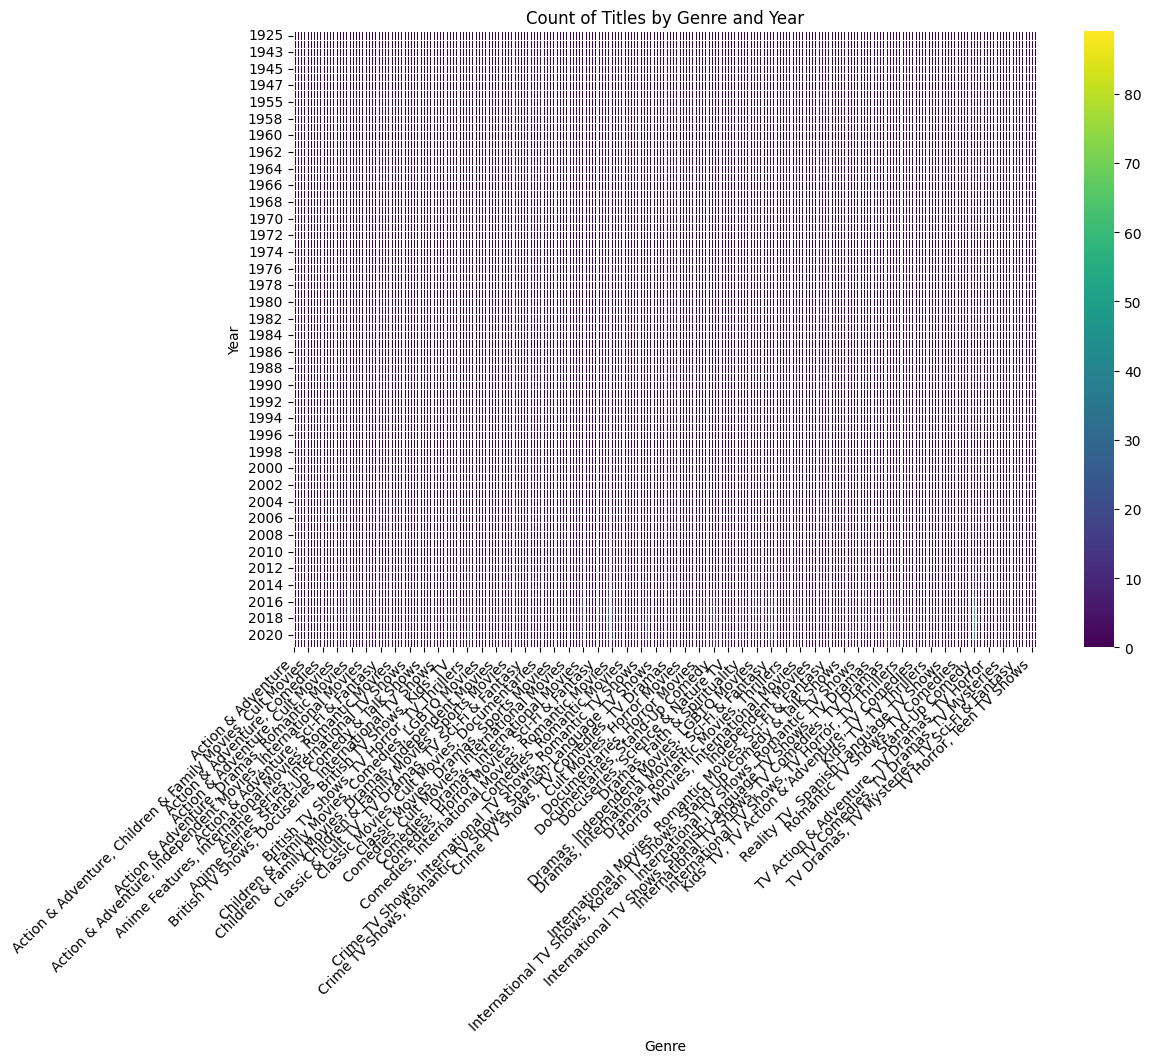

In [ ]:
a = netflix.copy()
a = a.drop_duplicates(subset=['title','listed_in','release_year'])
pivot_table = a.pivot_table(index='release_year', columns='listed_in', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linecolor='white', linewidths=0.5)
plt.title('Count of Titles by Genre and Year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.show()